[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ArtIC-TITECH/b3-proj-2024/blob/main/docs/theme_A.ipynb)

# 最適化関数におけるMomentumの評価

## 単純な２変数関数での評価

以下のセルは単純なSGDでの最適化です。

In [10]:
import os
import numpy as np
import torch
import plotly.graph_objects as go

# 2次元の関数 (例: f(x, y) = x^2 - 0.1 * y^2)
def func(x, y):
    return x**2 - 0.1 * y**2

# 勾配 (微分)
def grad_func(x, y):
    dx = 2 * x
    dy = -0.2 * y
    return torch.tensor([dx, dy])

# 初期値設定
x_init = torch.tensor([9.0, 1.0], requires_grad=True)
lr = 0.9  # 学習率
epochs = 15  # イテレーション数

# 最適化過程を保存
history = []

# SGD最適化
for epoch in range(epochs):
    grad = grad_func(x_init[0], x_init[1])
    with torch.no_grad():
        x_init -= lr * grad
    history.append(x_init.clone().detach().numpy())

# 3Dグラフの準備
x = np.linspace(-10, 10, 100)
y = np.linspace(0, 16, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# 最適化の軌跡
history = np.array(history)
trajectory = func(history[:, 0], history[:, 1])

# plotlyで3Dプロットを作成
fig = go.Figure()

# 関数の3Dサーフェス
fig.add_trace(go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.6))

# 最適化の軌跡
fig.add_trace(go.Scatter3d(
    x=history[:, 0], y=history[:, 1], z=trajectory,
    mode='markers+lines',
    marker=dict(size=5, color='red', opacity=1),
    line=dict(color='red', width=2)
))

# タイトルとラベル
fig.update_layout(
    title="Optimization Process without Momentum",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='f(x, y)'
    ),
    width=800,
    height=600
)

# Colabでインタラクティブに表示
fig.show()


以下のセルはMomentumを使った際の最適化です。先ほどよりも振動が抑えられています。

In [11]:
import os
import numpy as np
import torch
import plotly.graph_objects as go

# 2次元の関数 (例: f(x, y) = x^2 - 0.1 * y^2)
def func(x, y):
    return x**2 - 0.1 * y**2

# 勾配 (微分)
def grad_func(x, y):
    dx = 2 * x
    dy = -0.2 * y
    return torch.tensor([dx, dy])

# 初期値設定
x_init = torch.tensor([9.0, 1.0], requires_grad=True)
lr = 0.9  # 学習率
epochs = 15  # イテレーション数

# 最適化過程を保存
history = []

# モーメンタム法による最適化
momentum = 0.1  # モーメンタムのパラメータ
v = torch.zeros_like(x_init)  # 更新量

for epoch in range(epochs):
    grad = grad_func(x_init[0], x_init[1])

    # モーメンタムの更新
    v = momentum * v + grad
    with torch.no_grad():
        x_init -= lr * v  # 更新量に学習率を掛けて更新

    # 最適化の進行状況を保存
    history.append(x_init.clone().detach().numpy())

# 3Dグラフの準備
x = np.linspace(-10, 10, 100)
y = np.linspace(0, 16, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# 最適化の軌跡
history = np.array(history)
trajectory = func(history[:, 0], history[:, 1])

# plotlyで3Dプロットを作成
fig = go.Figure()

# 関数の3Dサーフェス
fig.add_trace(go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.6))

# 最適化の軌跡
fig.add_trace(go.Scatter3d(
    x=history[:, 0], y=history[:, 1], z=trajectory,
    mode='markers+lines',
    marker=dict(size=5, color='red', opacity=1),
    line=dict(color='red', width=2)
))

# タイトルとラベル
fig.update_layout(
    title="Optimization Process without Momentum",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='f(x, y)'
    ),
    width=800,
    height=600
)

# Colabでインタラクティブに表示
fig.show()


## GIF保存用コード

In [12]:
!pip install -U kaleido
import kaleido

import os
import numpy as np
import torch
import plotly.graph_objects as go
import imageio

# 画像保存用のディレクトリを作成
output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

# 2次元の関数 (例: f(x, y) = x^2 - 0.1 * y^2)
def func(x, y):
    return x**2 - 0.1*y**2

# 勾配 (微分)
def grad_func(x, y):
    dx = 2 * x
    dy = -0.2 * y
    return torch.tensor([dx, dy])

# 初期値設定
x_init = torch.tensor([9.0, 1.0], requires_grad=True)
lr = 0.9  # 学習率
epochs = 15  # イテレーション数

# 最適化過程を保存
history = []

# SGD最適化
for epoch in range(epochs):
    grad = grad_func(x_init[0], x_init[1])
    with torch.no_grad():
        x_init -= lr * grad
    history.append(x_init.clone().detach().numpy())

# 3Dグラフの準備
x = np.linspace(-10, 10, 100)
y = np.linspace(0, 16, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# 最適化の軌跡
history = np.array(history)
trajectory = func(history[:, 0], history[:, 1])

# plotlyで3Dプロットを作成
fig = go.Figure()

# 関数の3Dサーフェス
fig.add_trace(go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.6))

# 最適化の軌跡
fig.add_trace(go.Scatter3d(
    x=history[:, 0], y=history[:, 1], z=trajectory,
    mode='markers+lines',
    marker=dict(size=5, color='red', opacity=1),
    line=dict(color='red', width=2)
))

# タイトルとラベル
fig.update_layout(
    title="Optimization Process without Momentum",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='f(x, y)'
    ),
    width=800,
    height=600
)

# GIFの生成
frames = []
for angle in range(0, 360, 10):  # 10度ずつ回転
    fig.update_layout(scene_camera_eye=dict(x=1.25 * np.sin(np.radians(angle)), y=1.25 * np.cos(np.radians(angle)), z=0.5))

    # 画像を専用フォルダに保存
    filename = os.path.join(output_dir, f"frame_{angle}.png")
    fig.write_image(filename)

    # フレームを読み込んでリストに追加
    frames.append(imageio.imread(filename))

# GIF保存
imageio.mimsave("without_momentum.gif", frames, fps=10)


<ipython-input-12-2d9c67b030be>:85: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



In [13]:
# 画像保存用のディレクトリを作成
output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

# 2次元の関数 (例: f(x, y) = x^2 - 0.1 * y^2)
def func(x, y):
    return x**2 - 0.1*y**2

# 勾配 (微分)
def grad_func(x, y):
    dx = 2 * x
    dy = -0.2 * y
    return torch.tensor([dx, dy])

# 初期値設定
x_init = torch.tensor([9.0, 1.0], requires_grad=True)
lr = 0.9  # 学習率
epochs = 15  # イテレーション数

# 初期値設定
x_init = torch.tensor([9.0, 1.0], requires_grad=True)
lr = 0.9  # 学習率
epochs = 15  # イテレーション数

# 最適化過程を保存
history = []

# モーメンタム法による最適化
momentum = 0.1  # モーメンタムのパラメータ
v = torch.zeros_like(x_init)  # 更新量

for epoch in range(epochs):
    grad = grad_func(x_init[0], x_init[1])

    # モーメンタムの更新
    v = momentum * v + grad
    with torch.no_grad():
        x_init -= lr * v  # 更新量に学習率を掛けて更新

    # 最適化の進行状況を保存
    history.append(x_init.clone().detach().numpy())

# 3Dグラフの準備
x = np.linspace(-10, 10, 100)
y = np.linspace(0, 16, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# 最適化の軌跡
history = np.array(history)
trajectory = func(history[:, 0], history[:, 1])

# plotlyで3Dプロットを作成
fig = go.Figure()

# 関数の3Dサーフェス
fig.add_trace(go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.6))

# 最適化の軌跡
fig.add_trace(go.Scatter3d(
    x=history[:, 0], y=history[:, 1], z=trajectory,
    mode='markers+lines',
    marker=dict(size=5, color='red', opacity=1),
    line=dict(color='red', width=2)
))

# タイトルとラベル
fig.update_layout(
    title="Optimization Process with Momentum",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='f(x, y)'
    ),
    width=800,
    height=600
)

# GIFの生成
frames = []
for angle in range(0, 360, 10):  # 10度ずつ回転
    fig.update_layout(scene_camera_eye=dict(x=1.25 * np.sin(np.radians(angle)), y=1.25 * np.cos(np.radians(angle)), z=0.5))

    # 画像を専用フォルダに保存
    filename = os.path.join(output_dir, f"frame_{angle}.png")
    fig.write_image(filename)

    # フレームを読み込んでリストに追加
    frames.append(imageio.imread(filename))

# GIF保存
imageio.mimsave("with_momentum.gif", frames, fps=10)


<ipython-input-13-b547bd16cb83>:89: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



## MNISTでの評価

SGDにmomentumという引数があり、そこでmomentumの係数を変更できます。

Epoch [1/10], Loss: 0.4460, Accuracy: 85.96%
Epoch [2/10], Loss: 0.1737, Accuracy: 94.61%
Epoch [3/10], Loss: 0.1272, Accuracy: 96.09%
Epoch [4/10], Loss: 0.1015, Accuracy: 96.82%
Epoch [5/10], Loss: 0.0848, Accuracy: 97.38%
Epoch [6/10], Loss: 0.0737, Accuracy: 97.63%
Epoch [7/10], Loss: 0.0631, Accuracy: 97.99%
Epoch [8/10], Loss: 0.0571, Accuracy: 98.16%
Epoch [9/10], Loss: 0.0496, Accuracy: 98.38%
Epoch [10/10], Loss: 0.0457, Accuracy: 98.51%


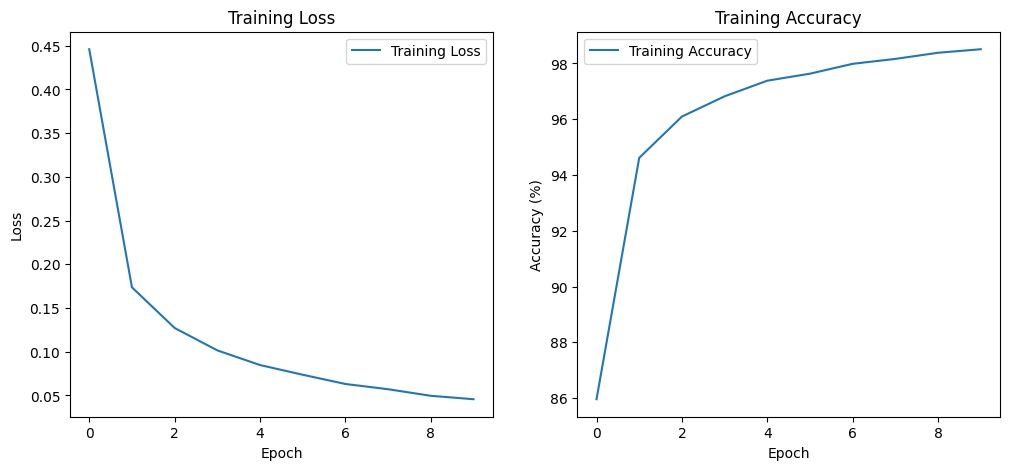

Test Accuracy: 97.55%


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# デバイスの設定（GPUが利用可能ならGPUを使用）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ハイパーパラメータの設定
batch_size = 64
learning_rate = 0.1
momentum = 0.1
num_epochs = 10

# データセットとデータローダーの準備
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# シンプルなニューラルネットワークモデルの定義
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # フラット化
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN().to(device)

# 損失関数と最適化手法の設定
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# 学習のメインループ
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # 順伝播
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 逆伝播と重みの更新
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # ロスと精度の計算
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # エポックごとのロスと精度の記録
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

# 学習ロスと学習精度のプロット
plt.figure(figsize=(12, 5))

# ロスのプロット
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# 精度のプロット
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()

plt.show()

# テスト精度の計算
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")